In [1]:
from enum import auto
import pandas as pn
import numpy as ny
import matplotlib.pyplot as plot 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
#Importing our dataset (bank-full dataset)
bank_dataset = pn.read_csv("bank-full.csv")

#To display how many rows and the columns of our dataset (bank-full dataset)
# print(bank_dataset.shape)

#To display our dataset as (pandas.core.frame.DataFrame)
print(bank_dataset.head())

   age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]


In [3]:
labEn = LabelEncoder()
bank_dataset['job'] = labEn.fit_transform(bank_dataset['job'])
bank_dataset['marital']= labEn.fit_transform(bank_dataset['marital'])
bank_dataset['education']= labEn.fit_transform(bank_dataset['education'])
bank_dataset['default']= labEn.fit_transform(bank_dataset['default'])
bank_dataset['housing']= labEn.fit_transform(bank_dataset['housing'])
bank_dataset['loan']= labEn.fit_transform(bank_dataset['loan'])
bank_dataset['contact']= labEn.fit_transform(bank_dataset['contact'])
bank_dataset['month']= labEn.fit_transform(bank_dataset['month'])
bank_dataset['y']= labEn.fit_transform(bank_dataset['y'])
bank_dataset['poutcome']= labEn.fit_transform(bank_dataset['poutcome'])


0    39922
1    36548
Name: y, dtype: int64


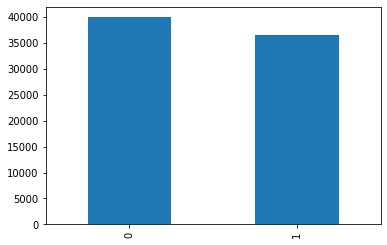

In [4]:
bank_dataset_majority = bank_dataset[bank_dataset.y==0]
bank_dataset_minority = bank_dataset[bank_dataset.y==1]
 
# Upsample minority class
bank_dataset_minority_upsampled = resample(bank_dataset_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=36548)   # to match majority class
                              
 
#Combine majority class with upsampled minority class
bank_dataset_upsampled = pn.concat([bank_dataset_majority, bank_dataset_minority_upsampled])
print(bank_dataset_upsampled['y'].value_counts())
bank_dataset_upsampled['y'].value_counts().plot(kind='bar')


In [6]:
#These 2 lines are to divide dataset into classes and labels
cls = bank_dataset_upsampled.drop('y', axis=1) #drop the label and save classes in cls
lbl = bank_dataset_upsampled['y'] #put labels only in y

# DataFrames = ny.arange(0, len(cls))

# plty=ny.array(cls)

# plot.title('Dataset')
# plot.plot(DataFrames, plty)
# plot.xlabel('DataFrames')
# plot.ylabel('Classes')
# plot.show()

#divide our bank dataset into training set and testing set

In [7]:
cls_train, cls_test, lbl_train, lbl_test = train_test_split(cls, lbl, test_size = 0.30)

sc = StandardScaler()
cls_train = sc.fit_transform(cls_train)
cls_test = sc.transform(cls_test)

#Train dataset
sclassifier = svm.SVC(kernel='rbf') #Gaussian kernel
sclassifier.fit(cls_train, lbl_train) #We use fit method of SVC to train the algorithm on our dataset

SVC()

In [8]:
#Prediction
lbl_pred = sclassifier.predict(cls_test) #predict is a method of the SVC class that make prediction

plty=ny.array(cls_test)
pltx=ny.array(lbl_test)

# print(len(pltx))
# print(len(plty))


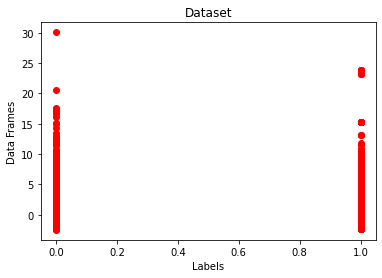

In [9]:
plot.title('Dataset')
plot.plot(pltx, plty , 'b.',label="Test Data")
plot.plot(lbl_pred, plty,'ro', label="Pred Data")
plot.xlabel('Labels')
plot.ylabel('Data Frames')
plot.show()

In [10]:
#Display the confusion matrix
cm = confusion_matrix(lbl_test,lbl_pred)
print(confusion_matrix(lbl_test,lbl_pred))
print(classification_report(lbl_test,lbl_pred))

TP = cm[0][0]  #TruePositive
FP = cm[0][1]  #FalsePositive
FN = cm[1][0]  #FalseNegative
TN = cm[1][1]  #TrueNegative

Acc = (TP + TN) / (TP + FP + TN +FN)
Pre = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = 2 *( (Pre * Recall) /(Pre + Recall) )
print("Precision:", Pre)
print("Recall:", Recall)
print("F1:", F1_Score)
print("Accuracy:",Acc)


[[9937 2010]
 [1409 9585]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     11947
           1       0.83      0.87      0.85     10994

    accuracy                           0.85     22941
   macro avg       0.85      0.85      0.85     22941
weighted avg       0.85      0.85      0.85     22941

Precision: 0.831756926425044
Recall: 0.8758152652917328
F1: 0.8532177048898811
Accuracy: 0.8509655202475916
